In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [34]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


<Axes: >

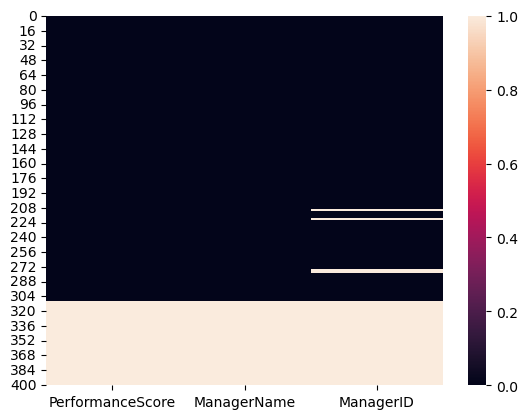

In [35]:
df[['PerformanceScore', 'ManagerName', 'ManagerID']].isnull()
sns.heatmap(df[['PerformanceScore', 'ManagerName', 'ManagerID']].isnull())

In [36]:
df.dropna(thresh=2,inplace=True)

#mamy kilka brakujących danych w kolumnie Manager ID, więc będę korzystać z ManagerName
ZAGADNINENIE NR 1

In [42]:
boss_perf=df[['ManagerName','PerformanceScore']].copy()
boss_perf

,ManagerName,PerformanceScore
0,Brandon R. LeBlanc,Fully Meets
1,Brandon R. LeBlanc,Fully Meets
2,Brandon R. LeBlanc,Fully Meets
3,Brandon R. LeBlanc,Fully Meets
4,Brandon R. LeBlanc,Fully Meets
...,...,...
305,Peter Monroe,Fully Meets
306,Peter Monroe,Fully Meets
307,Peter Monroe,Fully Meets
308,Peter Monroe,Fully Meets


In [45]:
scores={'PIP': 1,'Needs Improvement': 2,'Fully Meets': 3,'Exceeds': 4}
boss_perf['PerfScore_num'] = boss_perf['PerformanceScore'].map(scores)
boss_perf

,ManagerName,PerformanceScore,PerfScore_num
0,Brandon R. LeBlanc,Fully Meets,3
1,Brandon R. LeBlanc,Fully Meets,3
2,Brandon R. LeBlanc,Fully Meets,3
3,Brandon R. LeBlanc,Fully Meets,3
4,Brandon R. LeBlanc,Fully Meets,3
...,...,...,...
305,Peter Monroe,Fully Meets,3
306,Peter Monroe,Fully Meets,3
307,Peter Monroe,Fully Meets,3
308,Peter Monroe,Fully Meets,3


In [78]:
bosses=boss_perf.groupby('ManagerName')['PerfScore_num'].mean()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Alex Sweetwater'),
  Text(1, 0, 'Amy Dunn'),
  Text(2, 0, 'Board of Directors'),
  Text(3, 0, 'Brandon R. LeBlanc'),
  Text(4, 0, 'Brannon Miller'),
  Text(5, 0, 'Brian Champaigne'),
  Text(6, 0, 'David Stanley'),
  Text(7, 0, 'Debra Houlihan'),
  Text(8, 0, 'Elijiah Gray'),
  Text(9, 0, 'Eric Dougall'),
  Text(10, 0, 'Janet King'),
  Text(11, 0, 'Jennifer Zamora'),
  Text(12, 0, 'John Smith'),
  Text(13, 0, 'Kelley Spirea'),
  Text(14, 0, 'Ketsia Liebig'),
  Text(15, 0, 'Kissy Sullivan'),
  Text(16, 0, 'Lynn Daneault'),
  Text(17, 0, 'Michael Albert'),
  Text(18, 0, 'Peter Monroe'),
  Text(19, 0, 'Simon Roup'),
  Text(20, 0, 'Webster Butler')])

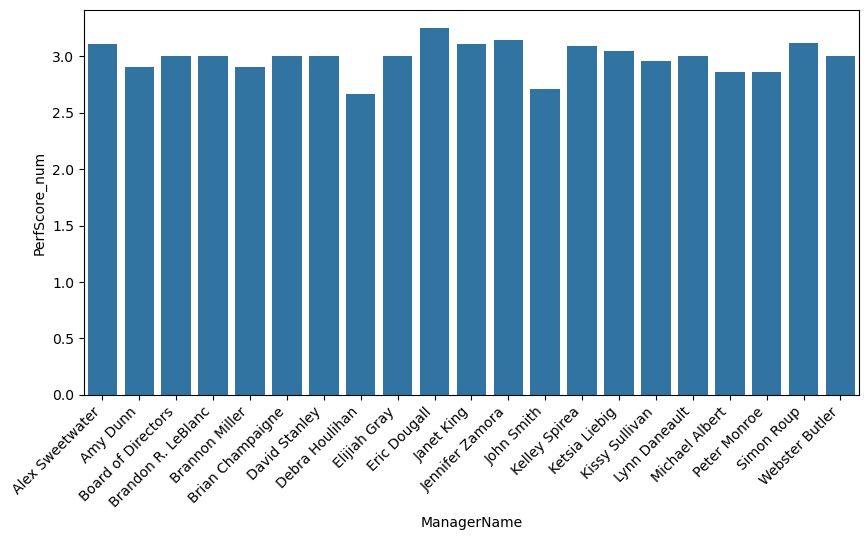

In [79]:
plt.figure(figsize=(10, 5))
sns.barplot(bosses)
plt.xticks(rotation=45, ha='right')

In [89]:
debradf=df[['ManagerName','Employee_Name','PerformanceScore']].set_index(['ManagerName','Employee_Name'])
debradf.loc['Debra Houlihan']

,PerformanceScore
Employee_Name,
"Daneault, Lynn",Fully Meets
"Kampew, Donysha",Fully Meets
"Smith, John",Needs Improvement


In [90]:
debradf.loc['John Smith']

,PerformanceScore
Employee_Name,
"Bunbury, Jessica",Fully Meets
"Carter, Michelle",Fully Meets
"Dietrich, Jenna",PIP
"Digitale, Alfred",Fully Meets
"Friedman, Gerry",Fully Meets
"Gill, Whitney",Fully Meets
"Gonzales, Ricardo",Fully Meets
"Guilianno, Mike",Fully Meets
"Leruth, Giovanni",Fully Meets


ODPOWIEDŹ NR 1: Wg mnie dane wskazują na to, że nie ma zależności między tym, kto jest przełożonym danego pracownika, a jaką uzyskuje on ocenę pracy. Rozkład jest równomierny.

ZAGADNIENIE NR 2

In [62]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [69]:
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = pd.Timestamp(dt.datetime(2019, 9, 27))
    else:
        end_date = row['DateofTermination']
    return (end_date - row['DateofHire']).days/365
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
hrdf=df[['RecruitmentSource','DateofHire','DateofTermination','Seniority']]
hrdf.head()

,RecruitmentSource,DateofHire,DateofTermination,Seniority
0,Diversity Job Fair,2008-10-27,NaT,10.923288
1,Website Banner Ads,2014-01-06,NaT,5.726027
2,Internet Search,2014-09-29,NaT,4.997260
3,Pay Per Click - Google,2015-02-16,2015-04-15,0.158904
4,Website Banner Ads,2015-05-01,NaT,4.410959


In [72]:
hrdf[['RecruitmentSource', 'Seniority']]

,RecruitmentSource,Seniority
0,Diversity Job Fair,10.923288
1,Website Banner Ads,5.726027
2,Internet Search,4.997260
3,Pay Per Click - Google,0.158904
4,Website Banner Ads,4.410959
...,...,...
305,Vendor Referral,4.882192
306,Employee Referral,4.882192
307,On-campus Recruiting,3.243836
308,Employee Referral,4.882192


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Diversity Job Fair'),
  Text(1, 0, 'Website Banner Ads'),
  Text(2, 0, 'Internet Search'),
  Text(3, 0, 'Pay Per Click - Google'),
  Text(4, 0, 'Social Networks - Facebook Twitter etc'),
  Text(5, 0, 'Billboard'),
  Text(6, 0, 'Monster.com'),
  Text(7, 0, 'Newspager/Magazine'),
  Text(8, 0, 'Professional Society'),
  Text(9, 0, 'Other'),
  Text(10, 0, 'Employee Referral'),
  Text(11, 0, 'Indeed'),
  Text(12, 0, 'Search Engine - Google Bing Yahoo'),
  Text(13, 0, 'Glassdoor'),
  Text(14, 0, 'Vendor Referral'),
  Text(15, 0, 'MBTA ads'),
  Text(16, 0, 'Information Session'),
  Text(17, 0, 'Word of Mouth'),
  Text(18, 0, 'Pay Per Click'),
  Text(19, 0, 'On-campus Recruiting'),
  Text(20, 0, 'On-line Web application'),
  Text(21, 0, 'Careerbuilder'),
  Text(22, 0, 'Company Intranet - Partner')])

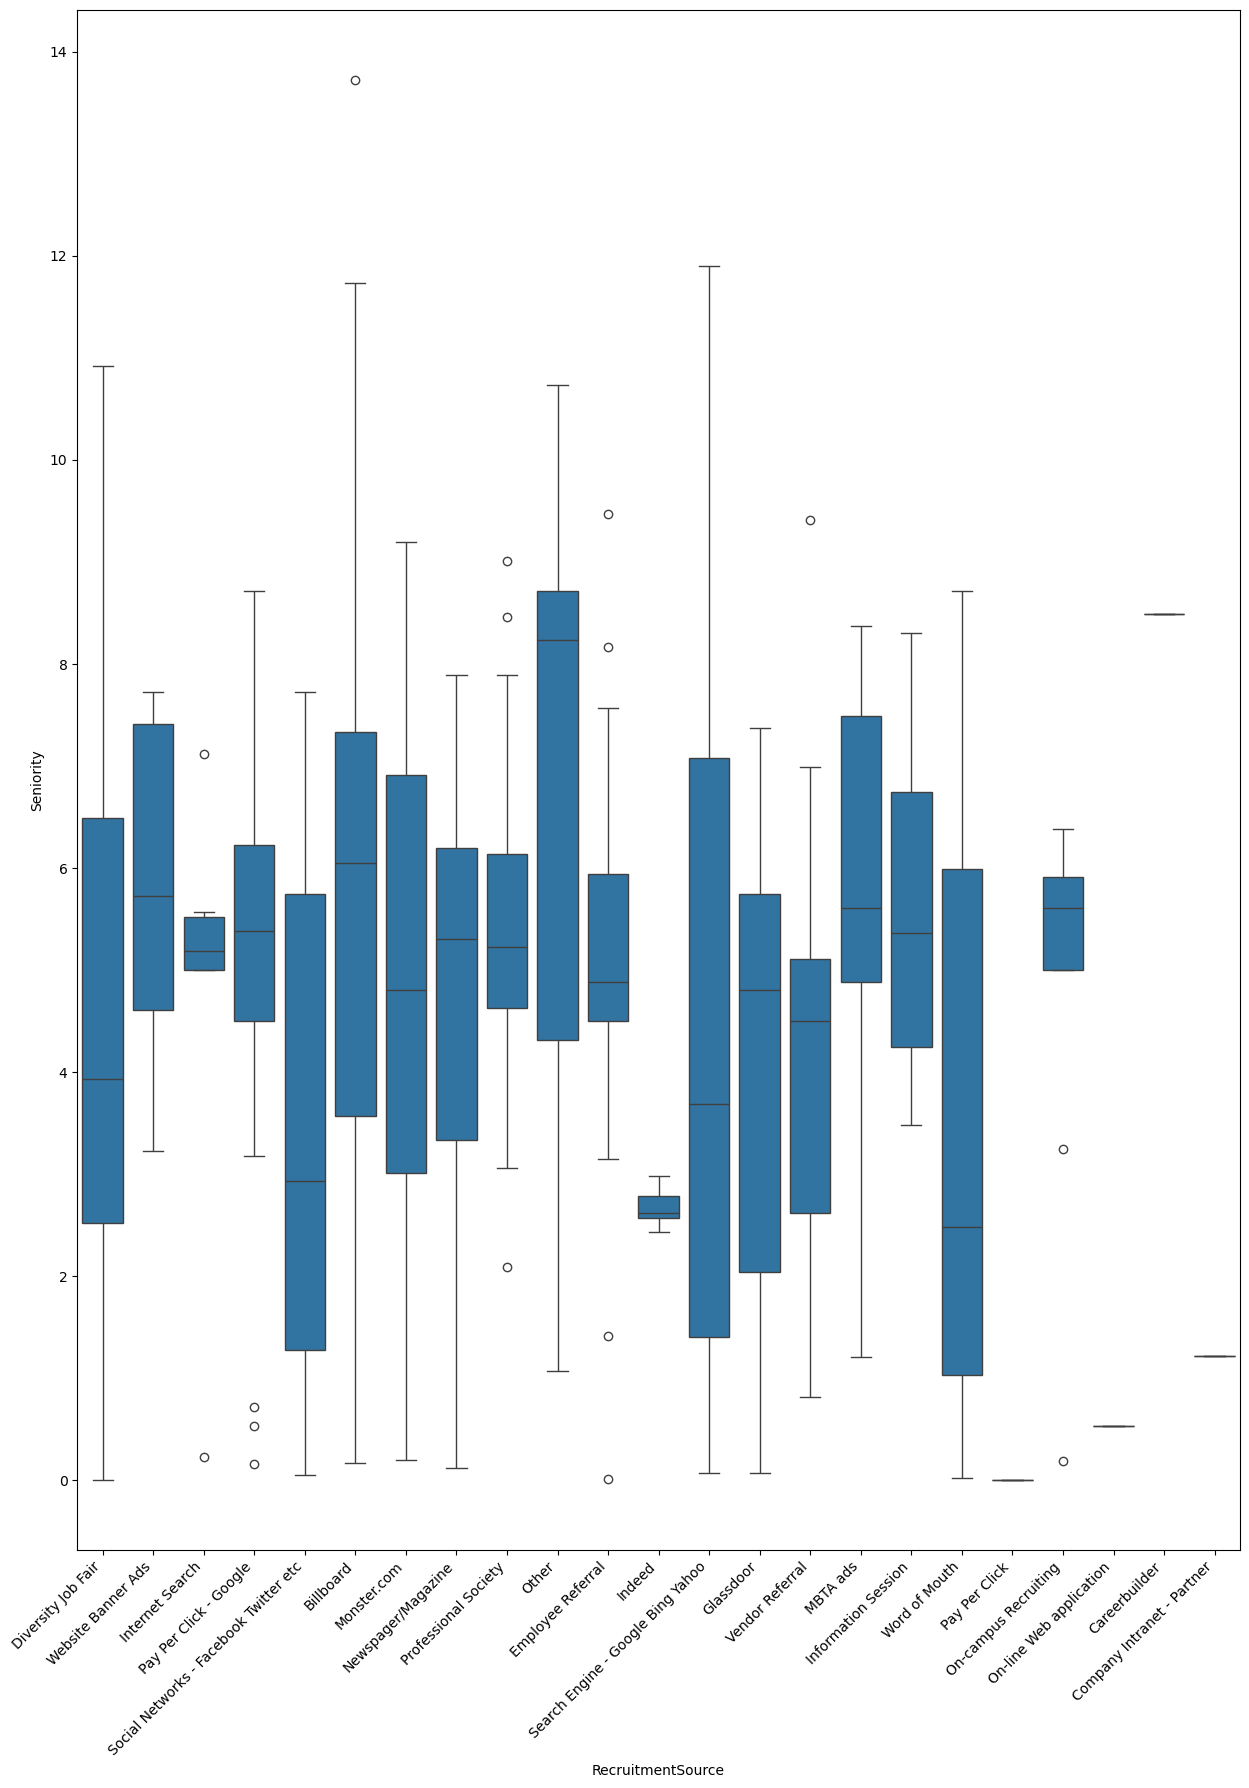

In [102]:
plt.figure(figsize=(15,20))
sns.boxplot(x='RecruitmentSource', y='Seniority', data=hrdf)
plt.xticks(rotation=45, ha='right')

ODPOWIEDŹ NR 2: NA MOJE OKO, Z BOXPLOTA WYNIKA, ŻE MAMY 4 WYRÓŻNIAJĄCE SIĘ POD WZGLĘDEM STAŻU PRACY 'ŹRÓDŁA' PRACOWNIKÓW: Diveristy Job Fair, Bilboard, Other, Search Engine. 
Kategoria Inne, mimo że i mediana i 3 kwartyl jest wyróżniająca się, to jest trudna do sprecyzowania i ewentualnego ponowego wykorzystania, więc nie jest cenną daną dla HR.
Diveristy Job Fair mają dość niską medianę, co pewnie sugeruje dużą rotację pracowników jednak. Podobnie pracownicy, którzy znaleźli firmę przez wyszukiwarkę.
Najpewniejszym 'źródłem' pozyskiwania pracownika jest chyba to, że zobaczy on ofertę firmy na bilboardzie. Mediana stażu jest największa, ale jednak w porónaniu z innymi - nieznacznie. 
Wydaje mi się, że oczywistych korelacji tu nie ma.

ZAGADNIENIE NR 3

In [109]:
df[['MaritalDesc', 'EmpSatisfaction']].groupby('MaritalDesc').mean()

,EmpSatisfaction
MaritalDesc,
Divorced,4.033333
Married,3.747967
Separated,3.833333
Single,3.970803
Widowed,4.250000


In [137]:
df.groupby('MaritalDesc').size()

MaritalDesc
Divorced      30
Married      123
Separated     12
Single       137
Widowed        8
dtype: int64

ODPOWIEDŹ NR 3: nie jestem pewna czy to najlepszy sposób na sprawdzenie istnienia korelacji, ale wygląda na to, że jednak naniższym poziomem zadowolenia wykazują się osoby po ślubie(pewnie mają dzieci i są zajechane). Różnice jednak są niewielkie ~ 0,5 punkta

ZAGADNIENIE NR 4

In [112]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')

In [118]:
active_employees = df[pd.isnull(df['DateofTermination'])].copy()
def count_age(row):
    end_date = pd.Timestamp(dt.datetime(2019, 9, 27))
    return (end_date - row['DOB']).days/365
active_employees['EmployeeAge'] = active_employees.apply(lambda row: count_age(row),axis=1)
active_employees[['Employee_Name','DOB', 'EmployeeAge', 'DateofTermination']]

,Employee_Name,DOB,EmployeeAge,DateofTermination
0,"Brown, Mia",1987-11-24,31.863014,NaT
1,"LaRotonda, William",1984-04-26,35.443836,NaT
2,"Steans, Tyrone",1986-09-01,33.093151,NaT
4,"Singh, Nan",1988-05-19,31.378082,NaT
7,"Carter, Michelle",2063-05-15,-43.660274,NaT
...,...,...,...,...
305,"Daniele, Ann",2052-01-18,-32.331507,NaT
306,"Lajiri, Jyoti",1986-04-23,33.452055,NaT
307,"Semizoglou, Jeremiah",1983-02-09,36.654795,NaT
308,"South, Joe",2065-09-09,-45.983562,NaT


ZAUWAŻYŁAM UJEMNY WIEK W NIEKTÓRYCH PRZYPADKACH, WIĘC SPRAWDZAM O CO KAMAN

<Axes: xlabel='DOB', ylabel='Count'>

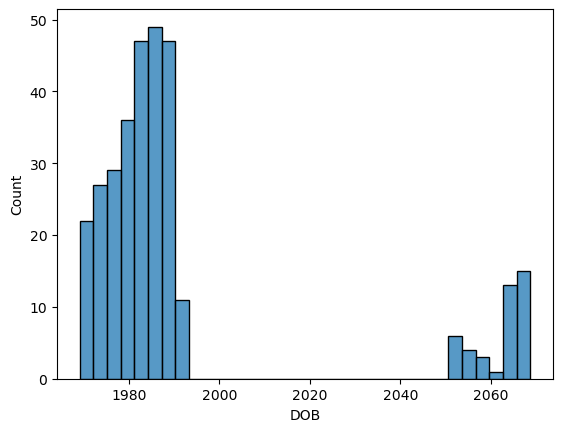

In [121]:
sns.histplot(df['DOB'])

In [122]:
type(df['DOB'])

pandas.core.series.Series

NO I WIDZĘ,ŻE AŻ OKOŁO 1/6 DOB JEST NIEPRAWIDŁOWA. To sporo, myślę, że mogę założyć, że błąd to 100 lat - oryginalna tabela podawała rok w tej dacie w formacie dwóch cyfr I JAK WYCZYTAŁAM PANDAS INTERPRETUJE TO JAKO >2000 - zmieniam wszystko na -100lat. Mój błąd, że nie sprawdziłam tego na wstępie zadania. Ale wyłapałam! 

<Axes: xlabel='DOB', ylabel='Count'>

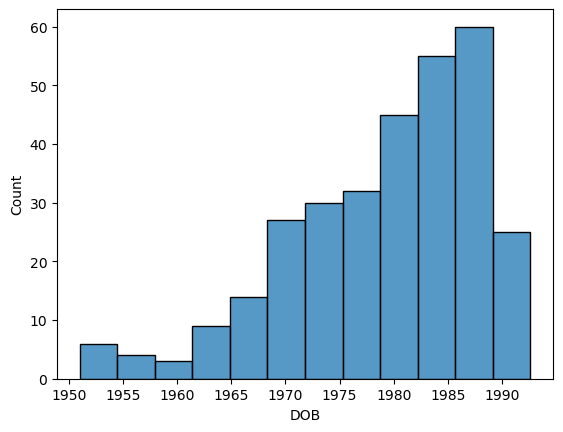

In [125]:
futureDobs = df['DOB'] > pd.Timestamp(dt.datetime(2019, 9, 27))
df.loc[futureDobs, 'DOB'] = df.loc[futureDobs, 'DOB'] - pd.DateOffset(years=100)
sns.histplot(df['DOB'])

naprawione :)

In [128]:
active_employees = df[pd.isnull(df['DateofTermination'])].copy()
def count_age(row):
    end_date = pd.Timestamp(dt.datetime(2019, 9, 27))
    return (end_date - row['DOB']).days/365
active_employees['EmployeeAge'] = active_employees.apply(lambda row: count_age(row),axis=1).round(0)
active_employees[['Employee_Name','DOB', 'EmployeeAge', 'DateofTermination']]

,Employee_Name,DOB,EmployeeAge,DateofTermination
0,"Brown, Mia",1987-11-24,32.0,NaT
1,"LaRotonda, William",1984-04-26,35.0,NaT
2,"Steans, Tyrone",1986-09-01,33.0,NaT
4,"Singh, Nan",1988-05-19,31.0,NaT
7,"Carter, Michelle",1963-05-15,56.0,NaT
...,...,...,...,...
305,"Daniele, Ann",1952-01-18,68.0,NaT
306,"Lajiri, Jyoti",1986-04-23,33.0,NaT
307,"Semizoglou, Jeremiah",1983-02-09,37.0,NaT
308,"South, Joe",1965-09-09,54.0,NaT


ODPOWIEDŹ NR 4

<Axes: xlabel='EmployeeAge', ylabel='Count'>

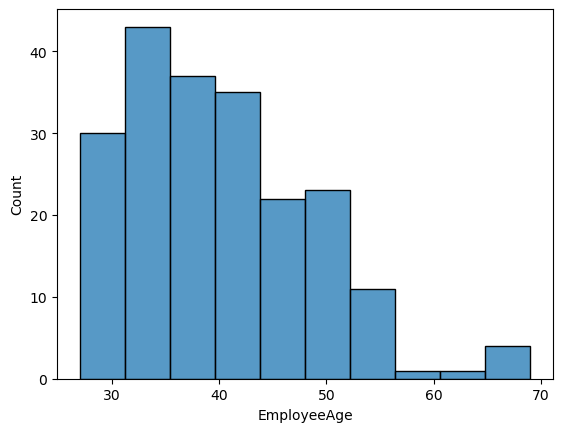

In [129]:
sns.histplot(data=active_employees, x='EmployeeAge', bins=10, kde=False)

ZAGADNIENIE NR 5

In [131]:
workload=active_employees[['EmployeeAge', 'SpecialProjectsCount']]
workload

,EmployeeAge,SpecialProjectsCount
0,32.0,6.0
1,35.0,4.0
2,33.0,5.0
4,31.0,5.0
7,56.0,0.0
...,...,...
305,68.0,8.0
306,33.0,6.0
307,37.0,5.0
308,54.0,4.0


<Axes: xlabel='EmployeeAge', ylabel='SpecialProjectsCount'>

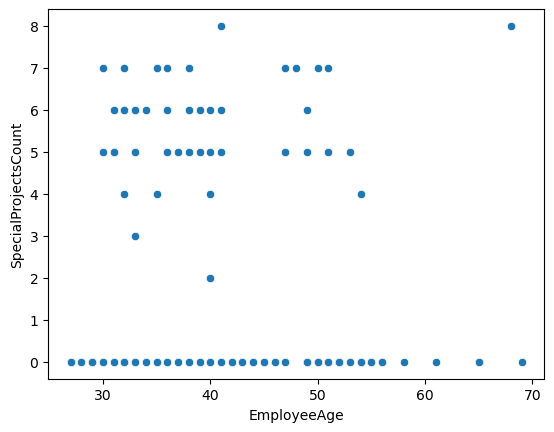

In [132]:
sns.scatterplot(x='EmployeeAge', y='SpecialProjectsCount', data=active_employees)

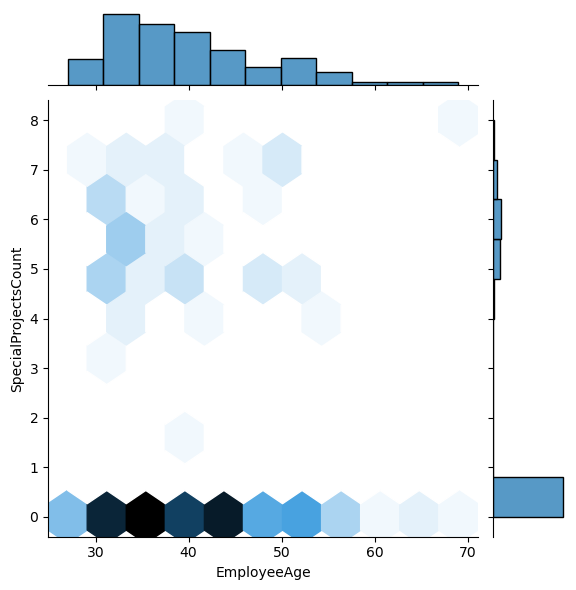

In [133]:
sns.jointplot(x='EmployeeAge',y='SpecialProjectsCount',data=active_employees,kind='hex')

ODPOWIEDŹ NR 5: nie, starsi pracownicy nie pracują nad większą liczbą projektów specjalnych, raczej przeciwnie - to u młodszych(ale nie najmłodszych) widać większe obciążenie pracą